In [ ]:
#import packages
import pandas as pd
import numpy as np
 
from sklearn.metrics import r2_score 
#to plot within notebook
import matplotlib.pyplot as plt
%matplotlib inline
 
 
#setting figure size
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,10
 
from google.colab import files
uploaded = files.upload()
 
#read the file
import io
df = pd.read_csv(io.BytesIO(uploaded['NESTLEIND.csv']))
 
#print the head
df.head()

Saving NESTLEIND.csv to NESTLEIND.csv


,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2010-01-08,NESTLEIND,EQ,2512.95,2555.00,2575.0,2475.20,2476.0,2494.65,2529.81,648,1.639316e+11,NaN,438,0.6759
1,2010-01-11,NESTLEIND,EQ,2494.65,2401.00,2515.0,2400.00,2500.0,2498.95,2494.44,825,2.057909e+11,NaN,638,0.7733
2,2010-01-12,NESTLEIND,EQ,2498.95,2540.00,2540.0,2471.35,2505.0,2502.85,2485.22,68346,1.698549e+13,NaN,67695,0.9905
3,2010-01-13,NESTLEIND,EQ,2502.85,2502.85,2540.0,2480.00,2489.8,2489.35,2491.94,1032,2.571682e+11,NaN,718,0.6957
4,2010-01-14,NESTLEIND,EQ,2489.35,2535.00,2595.0,2470.00,2560.0,2568.20,2510.27,330361,8.292956e+13,NaN,329193,0.9965


In [ ]:
#Reducing the dataset by taking values 2014-11-01 00:00:00 onwards
new_df = df.loc[df['Date'] >= "2015-03-31"]
new_df.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
1301,2015-03-31,NESTLEIND,EQ,6944.00,6950.0,7132.00,6827.60,7132.0,6947.35,6929.16,64200,4.448522e+13,13622.0,48338,0.7529
1302,2015-04-01,NESTLEIND,EQ,6947.35,7051.0,7059.95,6870.00,6890.2,6923.15,6975.99,13749,9.591290e+12,3889.0,8293,0.6032
1303,2015-04-06,NESTLEIND,EQ,6923.15,6988.9,7150.00,6926.40,7100.0,7121.35,7065.81,24913,1.760305e+13,6516.0,18331,0.7358
1304,2015-04-07,NESTLEIND,EQ,7121.35,7121.4,7174.95,7064.15,7125.0,7157.45,7136.35,17718,1.264419e+13,4542.0,12742,0.7192
1305,2015-04-08,NESTLEIND,EQ,7157.45,7146.0,7168.15,7010.00,7015.1,7046.20,7084.61,12695,8.993916e+12,4558.0,10240,0.8066


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


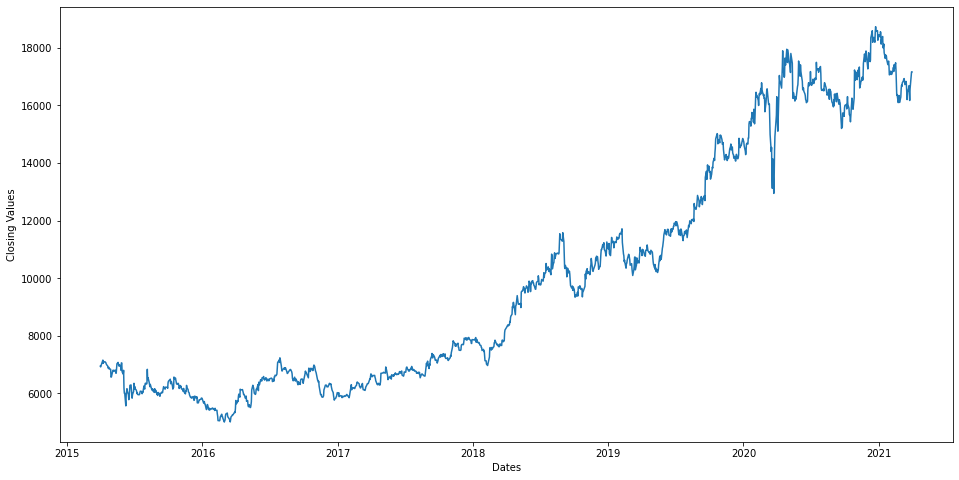

In [ ]:
#setting index as date
new_df['Date'] = pd.to_datetime(new_df.Date,format='%Y-%m-%d')
new_df.index = new_df['Date']
 
#plot
plt.figure(figsize=(16,8))
plt.ylabel('Closing Values')
plt.xlabel('Dates')
plt.plot(new_df['Close'], label='Close Price history')

In [ ]:
#importing required libraries
from sklearn.preprocessing import MinMaxScaler   #Translates value of each feature in the given range
from keras.models import Sequential              #The core idea of Sequential API is simply arranging the Keras layers in a sequential order 
from keras.layers import Dense,  LSTM

In [ ]:
#creating dataframe
data = new_df.sort_index(ascending=True, axis=0)
new_data = pd.DataFrame(index=range(0,len(new_df)),columns=['Date', 'Close'])
for i in range(0,len(data)):
    new_data['Date'][i] = data['Date'][i]
    new_data['Close'][i] = data['Close'][i]

In [ ]:
#setting index
new_data.index = new_data.Date
new_data.drop('Date', axis=1, inplace=True)

In [ ]:
new_data.head()

,Close
Date,
2015-03-31,6947.35
2015-04-01,6923.15
2015-04-06,7121.35
2015-04-07,7157.45
2015-04-08,7046.2


In [ ]:
#creating train and test sets
dataset = new_data.values

In [ ]:
dataset

array([[6947.35],
       [6923.15],
       [7121.35],
       ...,
       [16571.75],
       [17165.0],
       [17165.2]], dtype=object)

In [ ]:
train = dataset[0:1200,:]
test = dataset[1200:,:]

In [ ]:
#converting dataset into x_train and y_train
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)
print(scaled_data)

[[0.14130364]
 [0.13954039]
 [0.15398151]
 ...
 [0.84255029]
 [0.88577528]
 [0.88578985]]


In [ ]:
x_train, y_train = [], []
for i in range(70,len(train)):
    x_train.append(scaled_data[i-70:i,0])
    y_train.append(scaled_data[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)

In [ ]:
print(x_train.shape)

(1130, 70)


In [ ]:
print(y_train.shape)

(1130,)


In [ ]:
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))
print(x_train.shape)

(1130, 70, 1)


In [ ]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50))
model.add(Dense(1))

In [ ]:
model.compile(loss='mean_squared_error', optimizer='adam')
history=model.fit(x_train, y_train, validation_split = 0.33,epochs=100, batch_size=32, verbose=1)

Epoch 1/100
24/24 [==============================] - 23s 134ms/step - loss: 0.0077 - val_loss: 0.0010
Epoch 2/100
24/24 [==============================] - 2s 75ms/step - loss: 5.5339e-04 - val_loss: 0.0010
Epoch 3/100
24/24 [==============================] - 2s 77ms/step - loss: 3.3426e-04 - val_loss: 0.0018
Epoch 4/100
24/24 [==============================] - 2s 77ms/step - loss: 2.4978e-04 - val_loss: 0.0012
Epoch 5/100
24/24 [==============================] - 2s 76ms/step - loss: 2.4508e-04 - val_loss: 0.0012
Epoch 6/100
24/24 [==============================] - 2s 76ms/step - loss: 2.4067e-04 - val_loss: 9.9024e-04
Epoch 7/100
24/24 [==============================] - 2s 75ms/step - loss: 2.0885e-04 - val_loss: 9.2121e-04
Epoch 8/100
24/24 [==============================] - 2s 76ms/step - loss: 2.2309e-04 - val_loss: 8.8259e-04
Epoch 9/100
24/24 [==============================] - 2s 76ms/step - loss: 2.2069e-04 - val_loss: 8.6108e-04
Epoch 10/100
24/24 [==============================

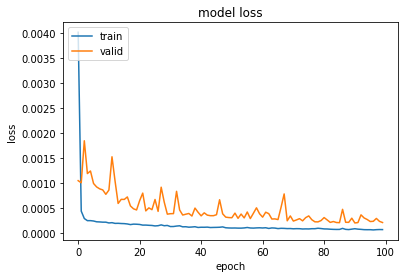

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

In [ ]:
#predicting  values, using past 70 from the train data
inputs = new_data[len(new_data) - len(test) - 70:].values
inputs = inputs.reshape(-1,1)
inputs  = scaler.transform(inputs)

In [ ]:
len(inputs)

356

In [ ]:
X_test = []
for i in range(70,inputs.shape[0]):
    X_test.append(inputs[i-70:i,0])
X_test = np.array(X_test)

In [ ]:
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
closing_price = model.predict(X_test)
closing_price = scaler.inverse_transform(closing_price)

In [ ]:
rms=np.sqrt(np.mean(np.power((test-closing_price),2)))
rms

328.51895056485614

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


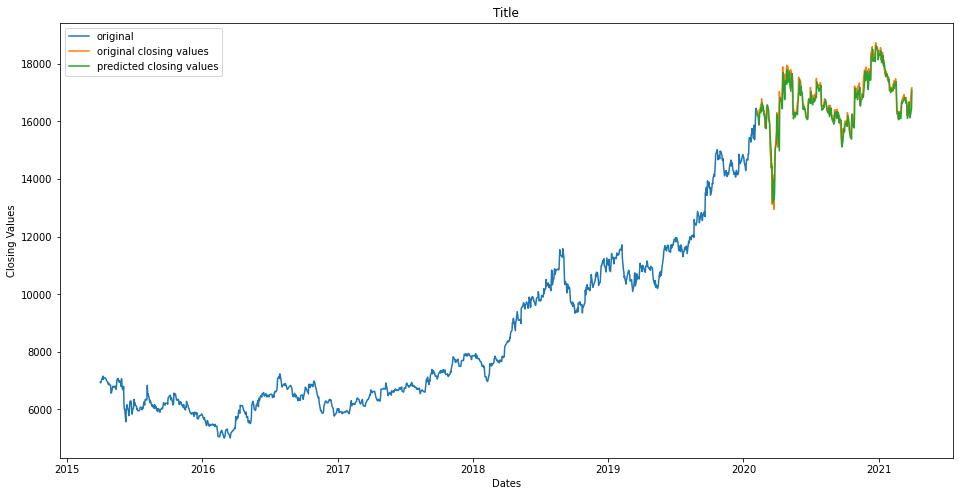

In [ ]:
#for plotting
train = new_data[:1200]
valid = new_data[1200:]
valid['Predictions'] = closing_price
plt.figure(figsize=(16,8))
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.title('Predicted Plot')
plt.ylabel('Closing Values')
plt.xlabel('Dates')
plt.legend(['original', 'original closing values','predicted closing values',], loc='upper left')
plt.show()

In [ ]:
r2_score(valid['Close'],valid['Predictions'])

0.8686047012182497